In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import the dataset

In [3]:

from google.colab import files
import io
 
uploaded = files.upload()

Saving student-por.csv to student-por.csv


In [4]:
grade_df = pd.read_csv(io.BytesIO(uploaded['student-por.csv']))
grade_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Choosing Response(Between G1,G2 and G3)


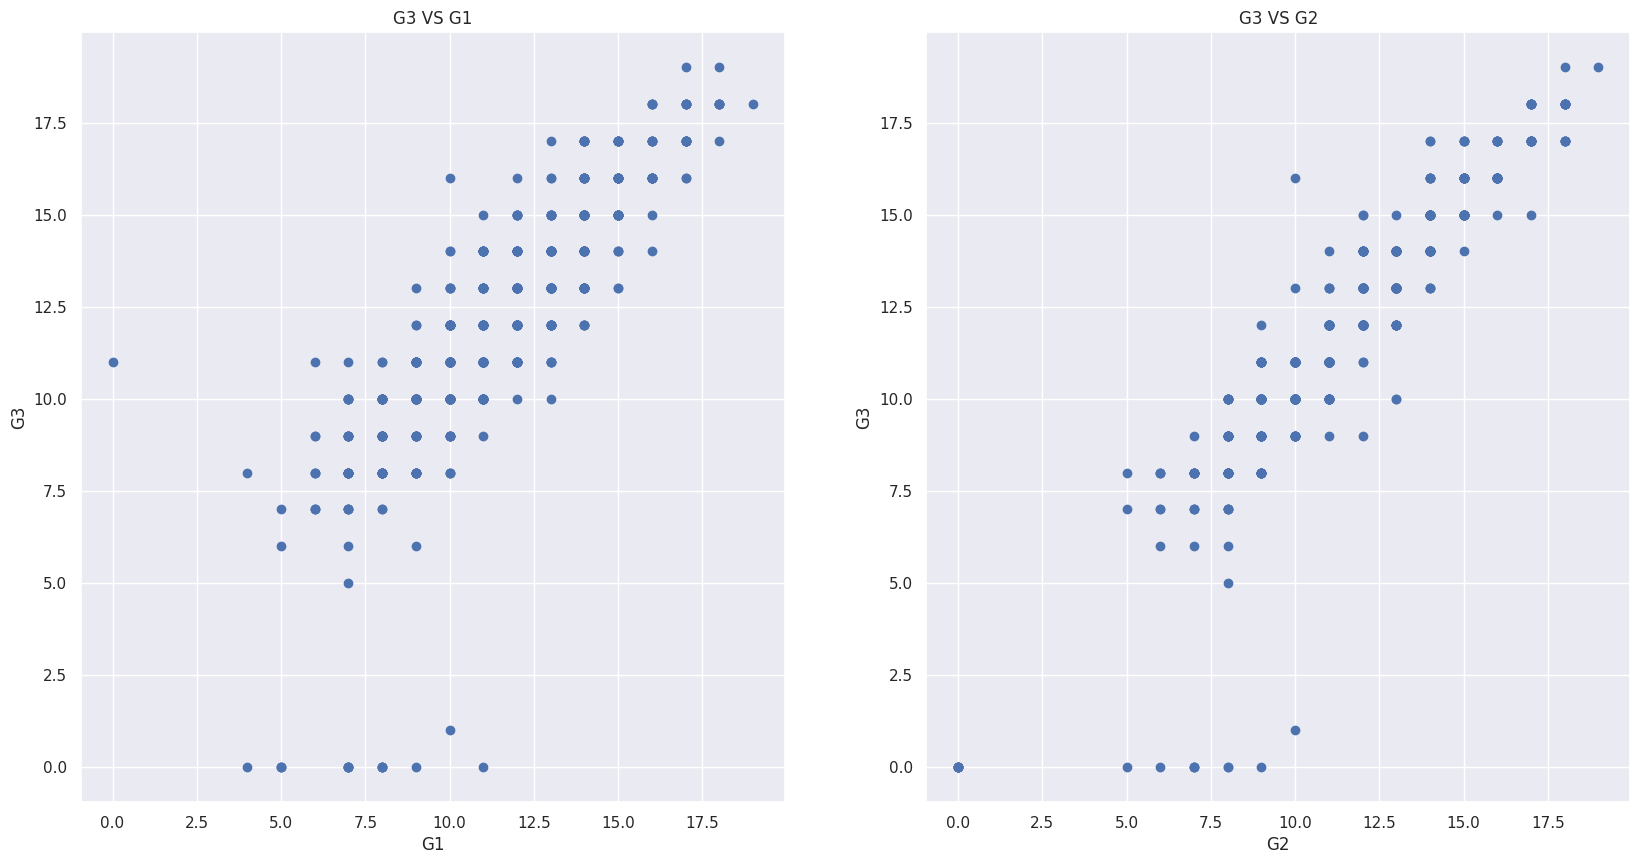

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
axes[0].scatter(data=grade_df, x='G1', y='G3')
axes[0].set_title('G3 VS G1')
axes[0].set_xlabel('G1')
axes[0].set_ylabel('G3')
axes[1].scatter(data=grade_df, x='G2', y='G3')
axes[1].set_title('G3 VS G2')
axes[1].set_xlabel('G2')
axes[1].set_ylabel('G3')
plt.show()

In [6]:
grade_df.drop(columns=['G1','G2'],inplace=True)
grade_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,10


### We chose G3 as our response and dropped G1 and G2 since we do not need to use them to predict G3.

### Reason: From the scatterplot, we can assume that students usually have roughly the same grade in the first and second periods and the final grade since points are scattered around the line y=x.  

# Exploratory data analysis (EDA)

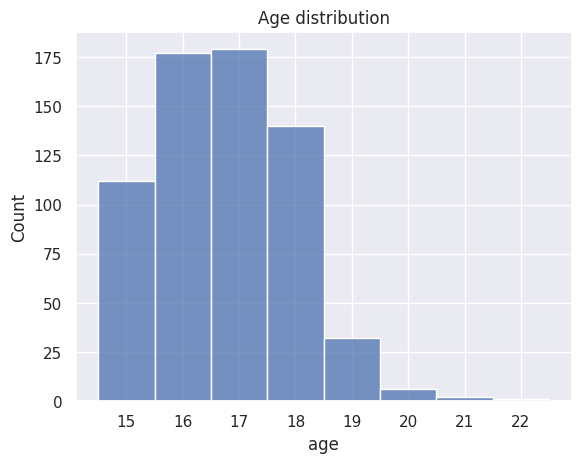

In [7]:
sb.histplot(grade_df.age, discrete=True)
plt.title('Age distribution')
plt.show()

<Axes: xlabel='absences', ylabel='Count'>

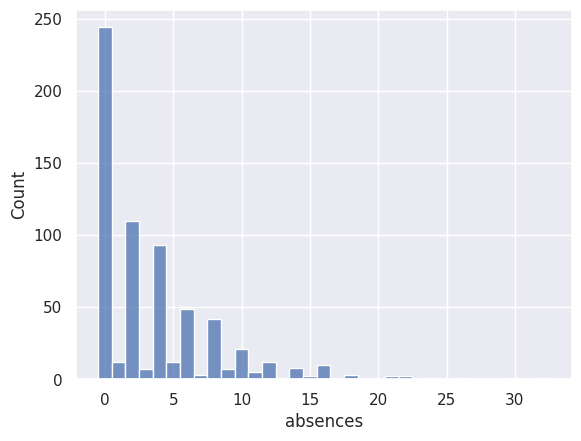

In [8]:
sb.histplot(grade_df.absences,bins=20,discrete=True)

In [9]:
numdf=grade_df[['age','absences','G3']]
numdf.corr()

,age,absences,G3
age,1.000000,0.149998,-0.106505
absences,0.149998,1.000000,-0.091379
G3,-0.106505,-0.091379,1.000000


### age and absences have low correlation with G3, so we will focus more on categorical variables

# Data Cleaning 

In [10]:
grade_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,649,2,GP,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,649,2,F,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,649.0,NaN,NaN,NaN,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
address,649,2,U,452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,649,2,GT3,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,649,2,T,569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,649.0,NaN,NaN,NaN,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,NaN,NaN,NaN,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
Mjob,649,5,other,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,649,5,other,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for NULL values and duplicates

In [11]:
grade_df.info() ##no null values
grade_df.drop_duplicates() ##no duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,10


### From dataset info, failures, school, sex, address, famsize, Pstatus, Medu, Fedu, studytime, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, and health are supposed to be categorical variables but are represented as numerical/binary variables. 

### We have decided to use One Hot encoding to encode all categorical variables. 

In [12]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
grade_cat = grade_df[['failures','school','sex','address','famsize','Pstatus','Medu','Fedu','Fjob','Mjob','reason','guardian','studytime','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health']]
ohe.fit(grade_cat)
grade_cat_ohe = pd.DataFrame(ohe.transform(grade_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(grade_cat.columns)) #change ohe.get_feature_names_out to ohe.get_feature_names if not working

# Check the encoded variables
grade_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 91 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   failures_0         649 non-null    float64
 1   failures_1         649 non-null    float64
 2   failures_2         649 non-null    float64
 3   failures_3         649 non-null    float64
 4   school_GP          649 non-null    float64
 5   school_MS          649 non-null    float64
 6   sex_F              649 non-null    float64
 7   sex_M              649 non-null    float64
 8   address_R          649 non-null    float64
 9   address_U          649 non-null    float64
 10  famsize_GT3        649 non-null    float64
 11  famsize_LE3        649 non-null    float64
 12  Pstatus_A          649 non-null    float64
 13  Pstatus_T          649 non-null    float64
 14  Medu_0             649 non-null    float64
 15  Medu_1             649 non-null    float64
 16  Medu_2             649 non

In [13]:
#combining numeric fratures with OHE categorical feature
#grade_num=grade_df[['age','absences']]
grade_res=grade_df['G3']
grade_ohe=pd.concat([grade_cat_ohe,grade_res],
                   sort=False,axis=1).reindex(index=grade_res.index)

grade_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 92 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   failures_0         649 non-null    float64
 1   failures_1         649 non-null    float64
 2   failures_2         649 non-null    float64
 3   failures_3         649 non-null    float64
 4   school_GP          649 non-null    float64
 5   school_MS          649 non-null    float64
 6   sex_F              649 non-null    float64
 7   sex_M              649 non-null    float64
 8   address_R          649 non-null    float64
 9   address_U          649 non-null    float64
 10  famsize_GT3        649 non-null    float64
 11  famsize_LE3        649 non-null    float64
 12  Pstatus_A          649 non-null    float64
 13  Pstatus_T          649 non-null    float64
 14  Medu_0             649 non-null    float64
 15  Medu_1             649 non-null    float64
 16  Medu_2             649 non

# Identifying top features affecting G3. (Feature importance/Feature selection)

[0.01326815 0.00715212 0.00234685 0.00219558 0.0109893  0.00999903
 0.01516666 0.01539444 0.0133167  0.01263565 0.01378519 0.01426468
 0.00862882 0.00829258 0.0008286  0.01076626 0.01434256 0.01361054
 0.01279415 0.00139707 0.01342035 0.01623754 0.01268507 0.01133643
 0.00611273 0.00383012 0.01760507 0.01554728 0.00518086 0.01123907
 0.00706834 0.01588425 0.0118881  0.00754846 0.01670542 0.0141152
 0.00902469 0.01355847 0.0140245  0.01522075 0.00417118 0.0141659
 0.01600657 0.01104964 0.0061455  0.00724991 0.0067857  0.01615892
 0.0163384  0.00501112 0.00564684 0.01453119 0.0144582  0.01188876
 0.01192111 0.00672818 0.00588807 0.01161143 0.01250738 0.01597811
 0.01477294 0.00354409 0.00368013 0.01113808 0.01872499 0.01596528
 0.0066597  0.01289614 0.01732867 0.01670332 0.00959911 0.00710447
 0.01562884 0.01636201 0.01533107 0.01351511 0.01257765 0.01070402
 0.00461723 0.00311981 0.00326948 0.01724943 0.01517294 0.01394489
 0.00912797 0.00539638 0.01216443 0.01191315 0.01391782 0.014221

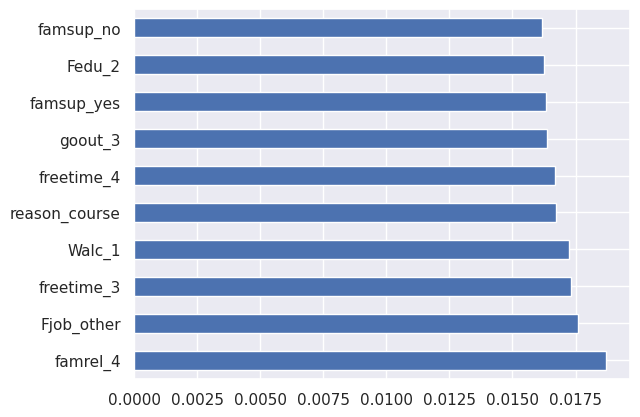

In [14]:

X = grade_ohe.iloc[:,0:90]  #independent columns
y = grade_ohe.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### From the Extra Trees Classifier algorithm, the top features are reason, famsup, famrel, Fjob, and freetime,Mjob.

Extra Trees Classifier constructs multiple decision tree, and the top feature selection is selected based on number of times a particular feature appears in the decision tress. 

### Since Extra Trees Classifier does not consider the correlation between the response and predictor. As a result, it is likely that some selected features have a high/low correlation with the response variable, which can affect the performance of the model.

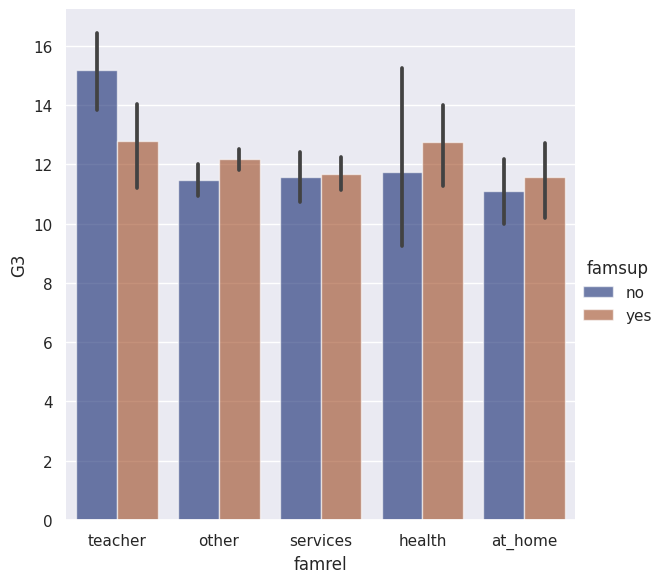

In [15]:
g = sb.catplot(
    data=grade_df, kind="bar",
    x="Fjob", y="G3", hue="famsup",
     palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("famrel", "G3")
#g.set_title("Fjob vs G3")

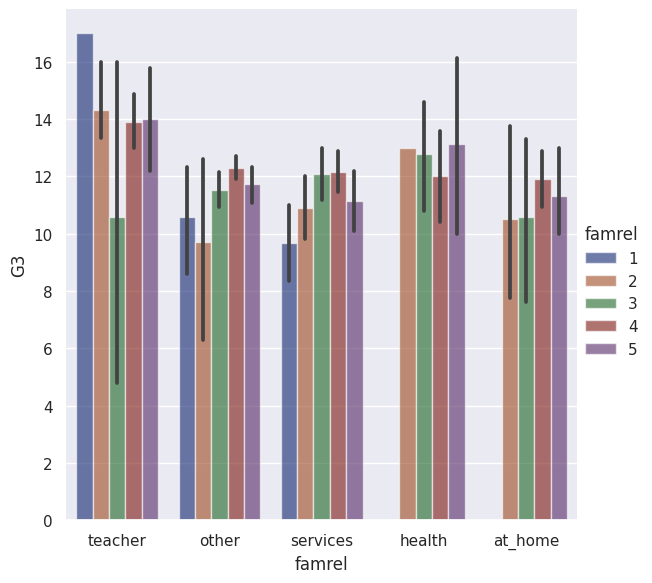

In [16]:
g = sb.catplot(
    data=grade_df, kind="bar",
    x="Fjob", y="G3", hue="famrel",
     palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("famrel", "G3")
#g.set_title("Fjob vs G3")

### It is interesting to see that students whose fathers are teachers perform better despite the lack of family support and bad family relations

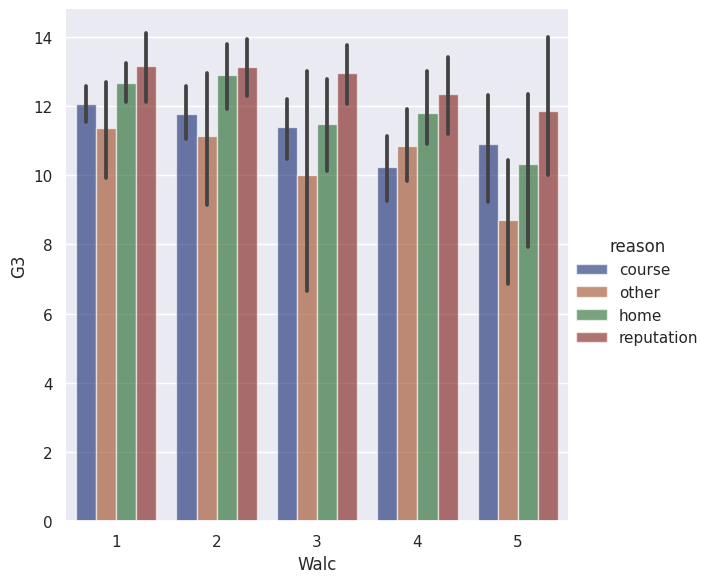

In [17]:
g = sb.catplot(
    data=grade_df, kind="bar",
    x="Walc", y="G3", hue="reason",
     palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Walc", "G3")
#g.set_title("Fjob vs G3")

### There is a downward trend in the students' grades as weekend alcohol consumption increases but students' who chose t school for its reputation consistently perform better than those who chose the school for any other reasons

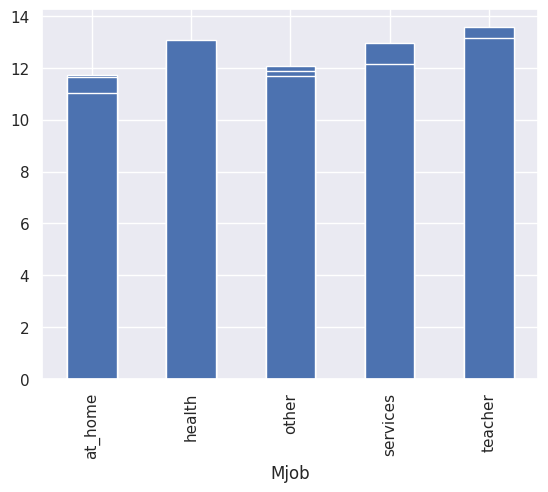

In [18]:
#f,axes = plt.subplots(5,1,figsize=(20,24))
count = 0
top5df=grade_df[['freetime','famrel','Fjob','reason','famsup','Mjob','G3']]
for var in top5df:
    if var!='G3':
        top5df.groupby(var)['G3'].mean().plot(kind='bar')
        #sb.barplot(x=var,y='G3',data=top5df,ax=axes[count])
        count+=1

# TODO: EDA for each of the top 6

## Freetime

<Axes: ylabel='Count'>

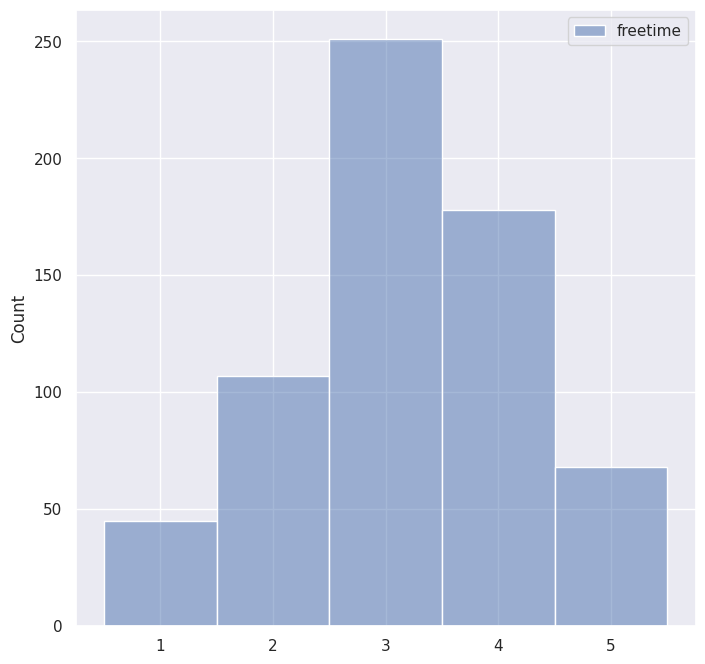

In [19]:
freetime = pd.DataFrame(grade_df['freetime'])
f = plt.figure(figsize=(8, 8))
sb.histplot(data = freetime, kde = False, discrete = True)

Majority of students rate their freetime as 3 or more

<Axes: xlabel='freetime', ylabel='G3'>

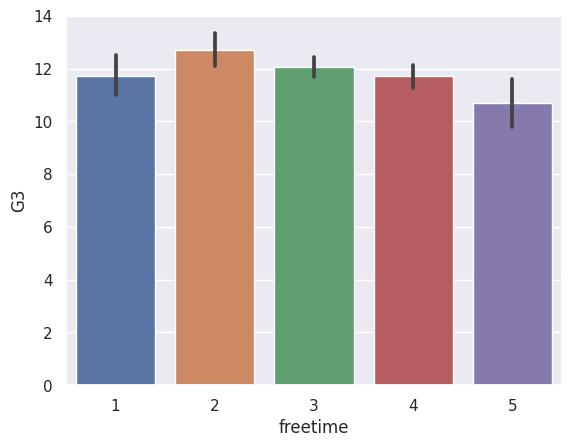

In [20]:
sb.barplot(x='freetime',y='G3',data=grade_df)

<Axes: xlabel='freetime', ylabel='G3'>

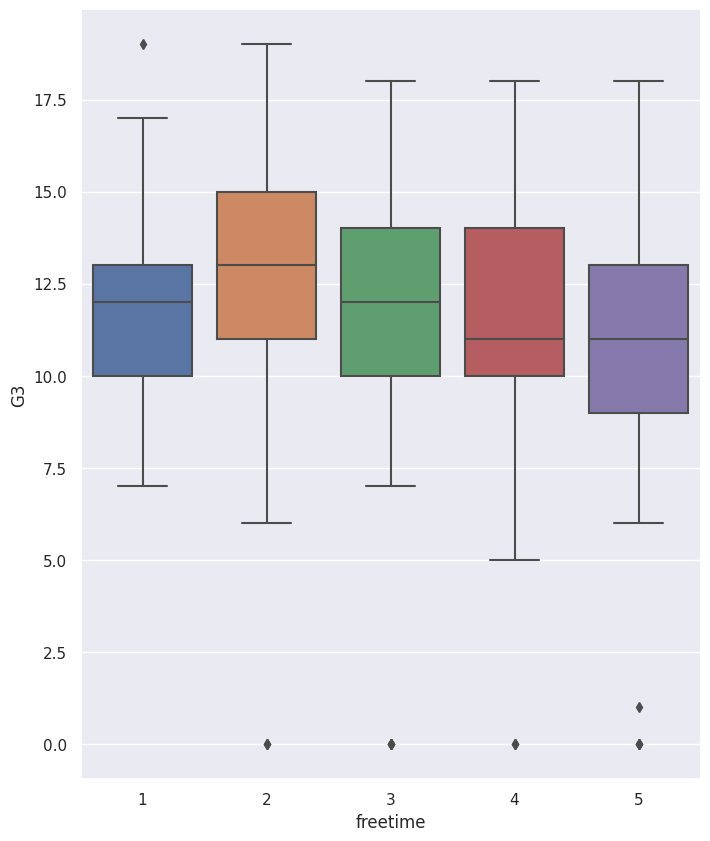

In [21]:
f = plt.figure(figsize=(8, 10))
sb.boxplot(x='freetime',y='G3',data=grade_df)

 There seems to be a negative relationship between freetime and G3. Median decreases from freetime=2 to freetime=5.
 
 Reason: Students who spend more time studying would indicate that they have less freetime and so score higher. 
 
 freetime = 1 is an outlier since it does not follow the downward trend.
 
 Possible reason: A lot of responsibilities other than studying which compromises their grades.

## famrel

<Axes: ylabel='Count'>

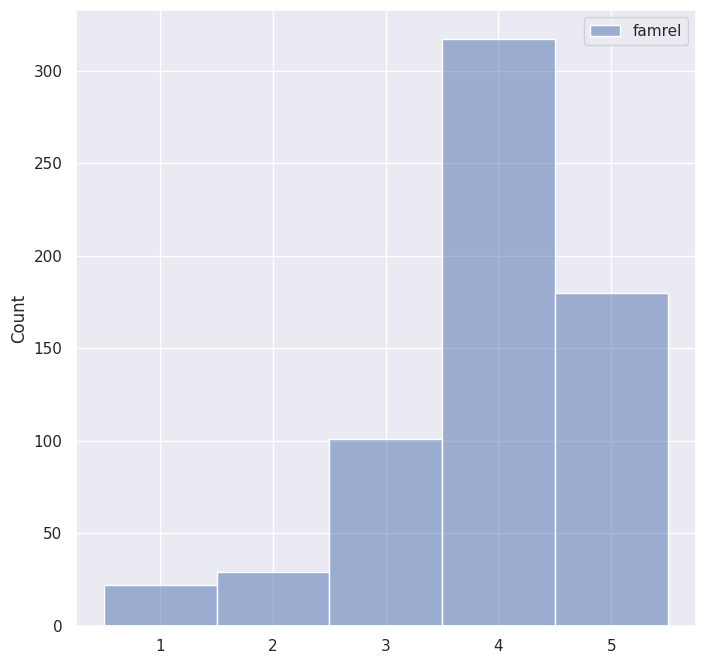

In [22]:
famrel = pd.DataFrame(grade_df['famrel'])
f = plt.figure(figsize=(8, 8))
sb.histplot(data = famrel, kde = False, discrete = True)

Very few students rate their famrel as 1 or 2.

<Axes: xlabel='famrel', ylabel='G3'>

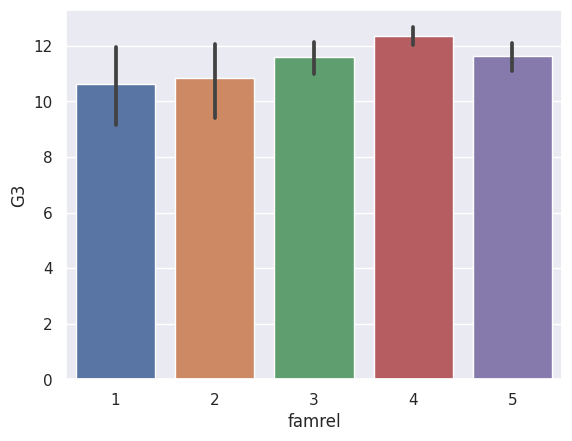

In [23]:
sb.barplot(x='famrel',y='G3',data=grade_df)

<Axes: xlabel='famrel', ylabel='G3'>

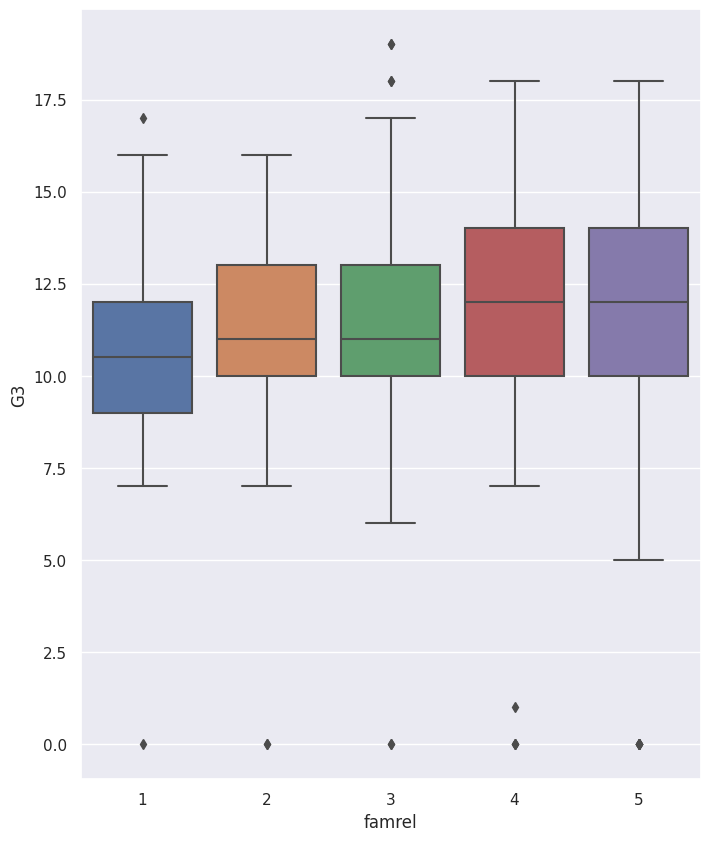

In [24]:
f = plt.figure(figsize=(8, 10))
sb.boxplot(x='famrel',y='G3',data=grade_df)

As famrel increases from 1 to 5, G3 median increases. 

## famsup


<Axes: xlabel='famsup', ylabel='Count'>

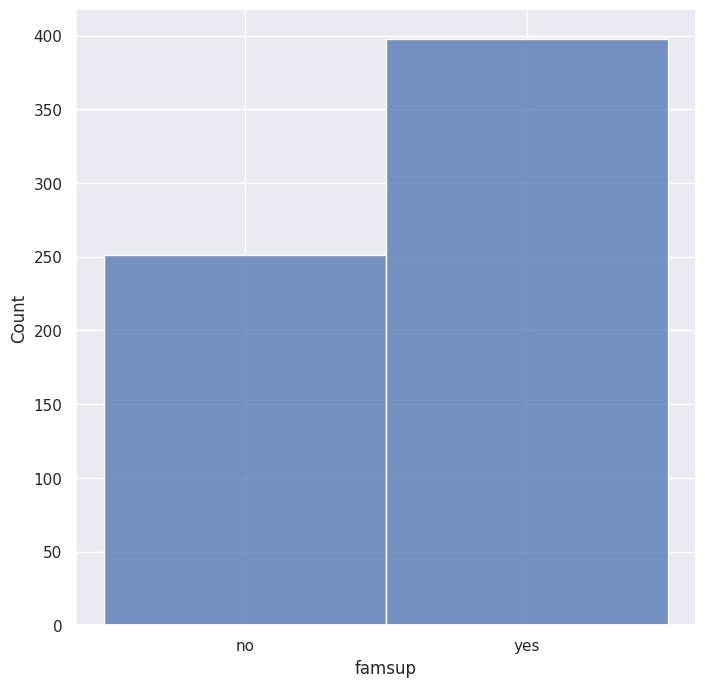

In [28]:
freetime = pd.DataFrame(grade_df['famsup'])
f = plt.figure(figsize=(8, 8))
sb.histplot(data = grade_df['famsup'], kde = False, discrete = True)

Majority of the students have family support


<Axes: xlabel='famsup', ylabel='G3'>

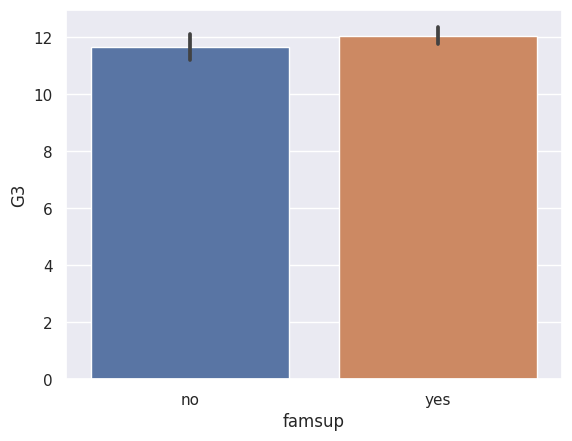

In [29]:
sb.barplot(x='famsup',y='G3',data=grade_df)

Students with family support seems to score better compared to students without family support. 

<Axes: xlabel='famsup', ylabel='G3'>

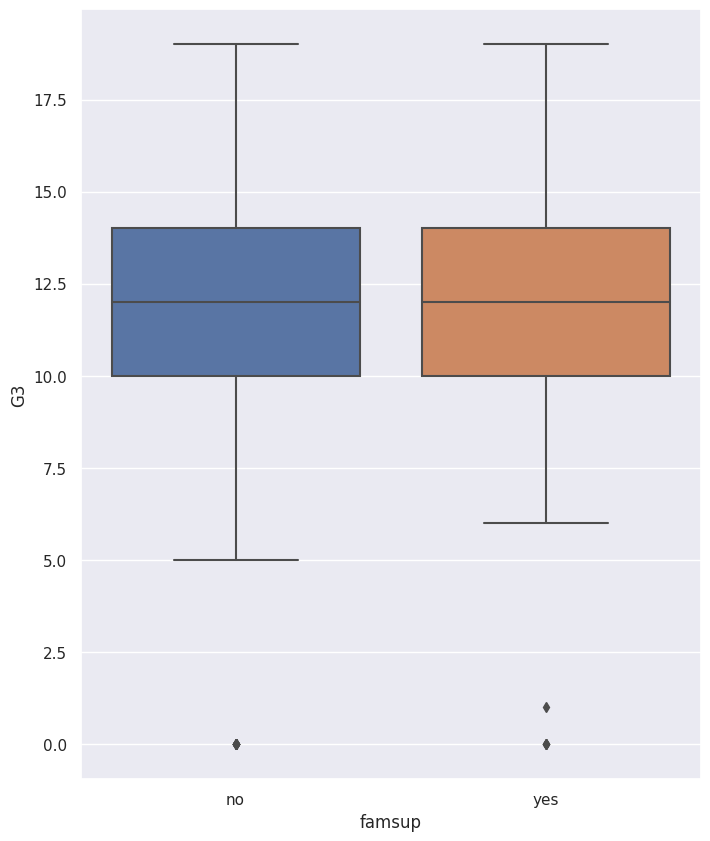

In [32]:
f = plt.figure(figsize=(8, 10))
sb.boxplot(x='famsup',y='G3',data=grade_df)

famsup(yes) and famsup(no) have approx the same median and maximum value but famsup(yes) have a higher minimum value compared to famsup(no)

## Mjob

<Axes: xlabel='Mjob', ylabel='Count'>

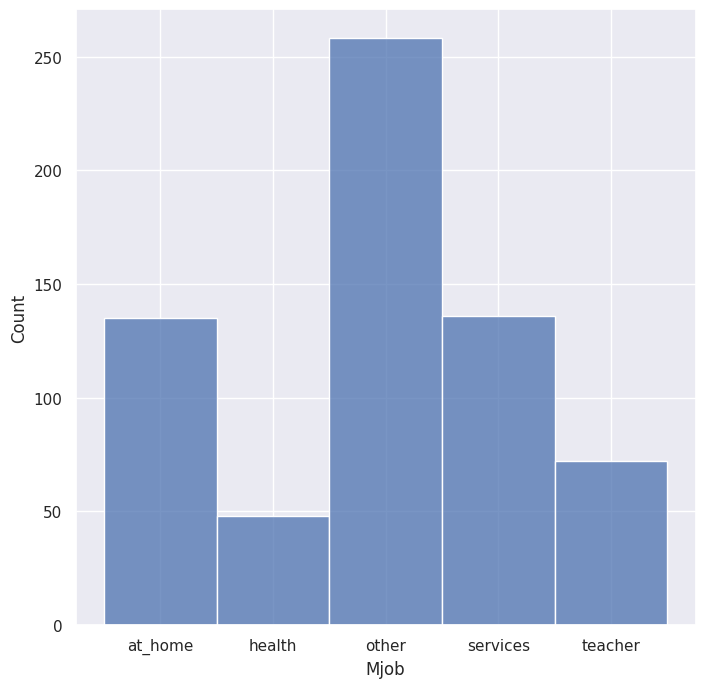

In [33]:
freetime = pd.DataFrame(grade_df['Mjob'])
f = plt.figure(figsize=(8, 8))
sb.histplot(data = grade_df['Mjob'], kde = False, discrete = True)

Majority of the students whose mothers' job is under the catergory other, followed by at_home/service, teacher and health.

<Axes: xlabel='Mjob', ylabel='G3'>

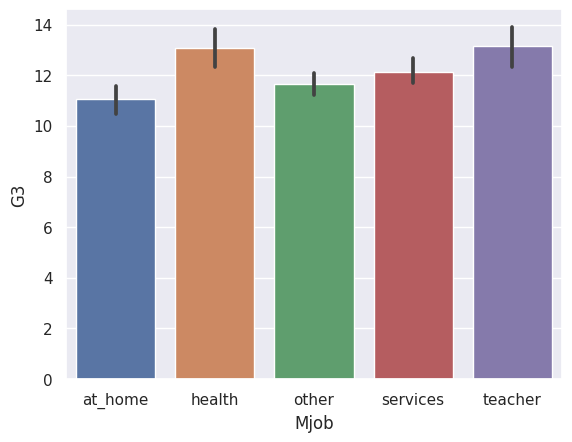

In [34]:
sb.barplot(x='Mjob',y='G3',data=grade_df)

Majority of students whose mothers' job that fall under the catergory teacher/health scored higher compared to students whose mothers' job that fall under the caterogory at_home, other and services. 

<Axes: xlabel='Mjob', ylabel='G3'>

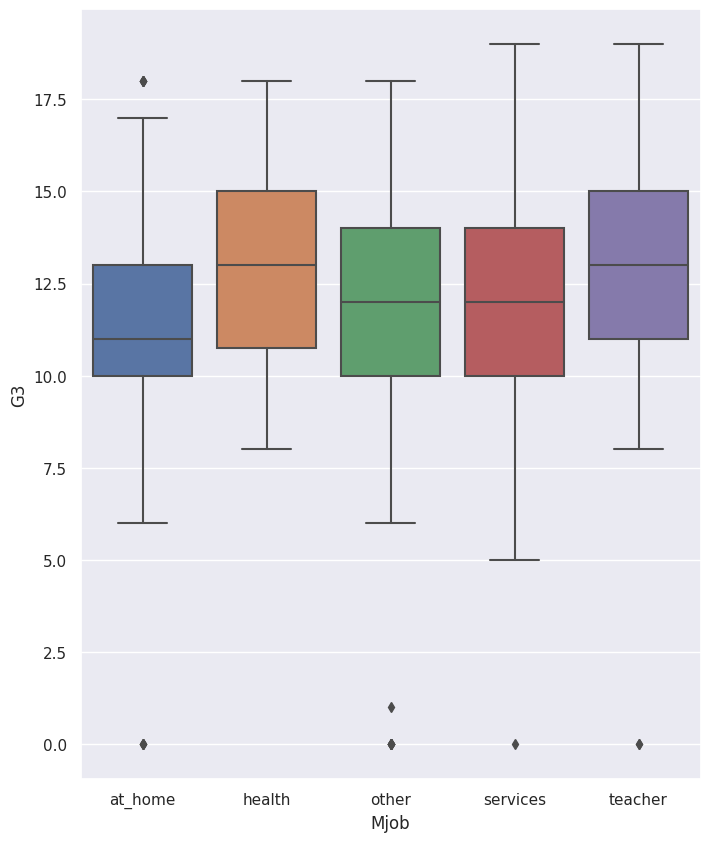

In [35]:
f = plt.figure(figsize=(8, 10))
sb.boxplot(x='Mjob',y='G3',data=grade_df)

students whose mothers' job that falls under the caterogry health and teacher have a higher median compared to jobs that fall under the other catergory. At the same time, job that falls under the catergory teacher have a higher maximum value compared to health.